## Chương 2: Sampling, Fourier Transform, and Convolution

#### __Bài tập 1:__ Thực hiện giảm mẫu với anti-aliasing bằng cách sử dụng bộ lọc thông thấp Gaussian (gợi ý: giảm kích thước ảnh xám của ngôi nhà xuống bốn lần, đầu tiên bằng cách áp dụng bộ lọc Gaussian, sau đó lọc bỏ từng dòng và cột xen kẽ. So sánh các ảnh đầu ra với và không có tiền xử lý bằng bộ lọc thông thấp trước khi giảm mẫu).

#### __Giải thích code__

#### 1. Cài đặt và nhập các thư viện cần thiết

In [ ]:
# Install the required package
%pip install scikit-image                           

# scikit-image để xử lý ảnh
import skimage
from skimage.color import rgb2gray
# scipy.ndimage để làm mờ ảnh
from scipy.ndimage import gaussian_filter
# numpy để xử lý mảng           
import numpy as np           
# matplotlib.pyplot để hiển thị ảnh                       
import matplotlib.pyplot as plt                     
import skimage.io
import skimage.util

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### 2. Đọc và chuyển đổi ảnh sang grayscale

In [ ]:
# Đọc ảnh từ đường dẫn và  chuyển đổi ảnh từ RGB sang grayscale
im = rgb2gray(skimage.io.imread('../images/umbc.png'))  
# Chuyển đổi ảnh grayscale trở lại RGB    
im_rgb = skimage.color.gray2rgb(im)                         
# Chuyển đổi ảnh sang định dạng uint8
im_rgb_uint8 = skimage.util.img_as_ubyte(im_rgb)            
# Lưu ảnh grayscale dưới dạng umbc_gray.jpg	
skimage.io.imsave('umbc_gray.jpg', im_rgb_uint8)    
# In kích thước của ảnh grayscale        
print(im.shape)                                             

(541, 811)


#### 3. Hiển thị ảnh grayscale

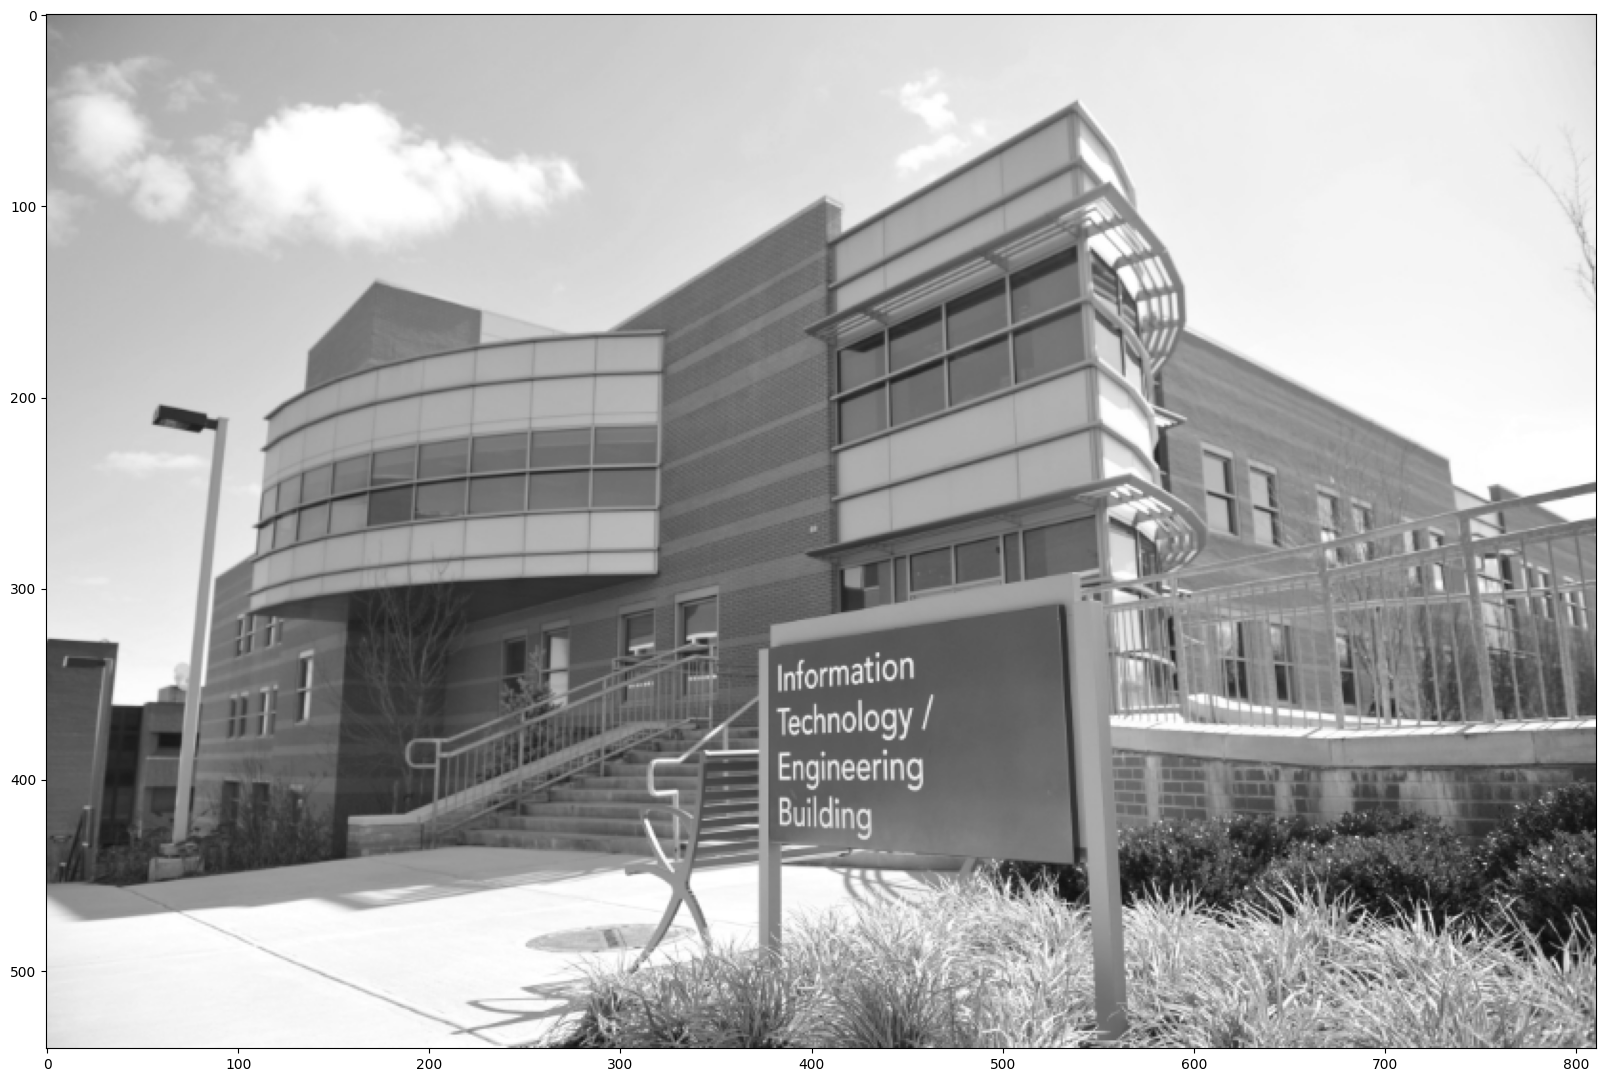

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(im_rgb_uint8)
plt.show()

#### 4. Làm mờ ảnh

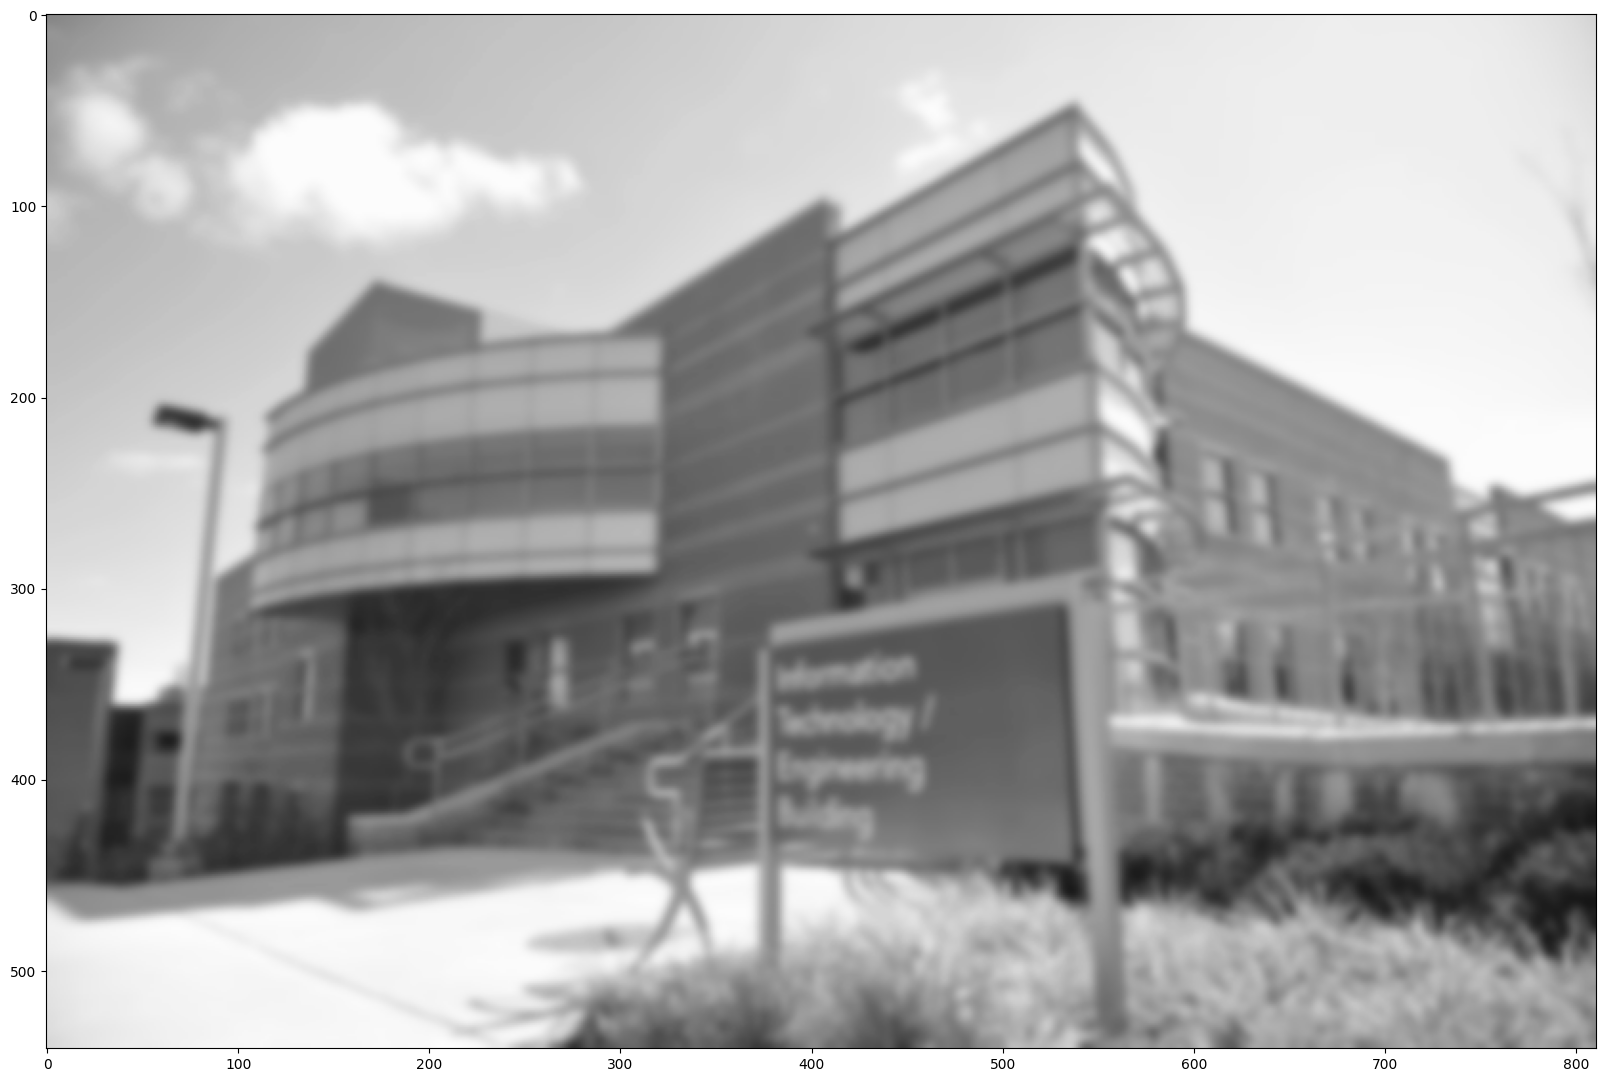

In [ ]:
plt.figure(figsize=(20,20))
# Làm mờ ảnh với sigma = 2.5
im_blurred = gaussian_filter(im_rgb_uint8, sigma=2.5) 
# Lưu ảnh đã làm mờ dưới dạng umbc_blurred.jpg  
skimage.io.imsave('umbc_blurred.jpg', im_blurred)      
# Hiển thị ảnh đã làm mờ 
plt.imshow(im_blurred)                                  
plt.show()

#### 5. Giảm kích thước ảnh

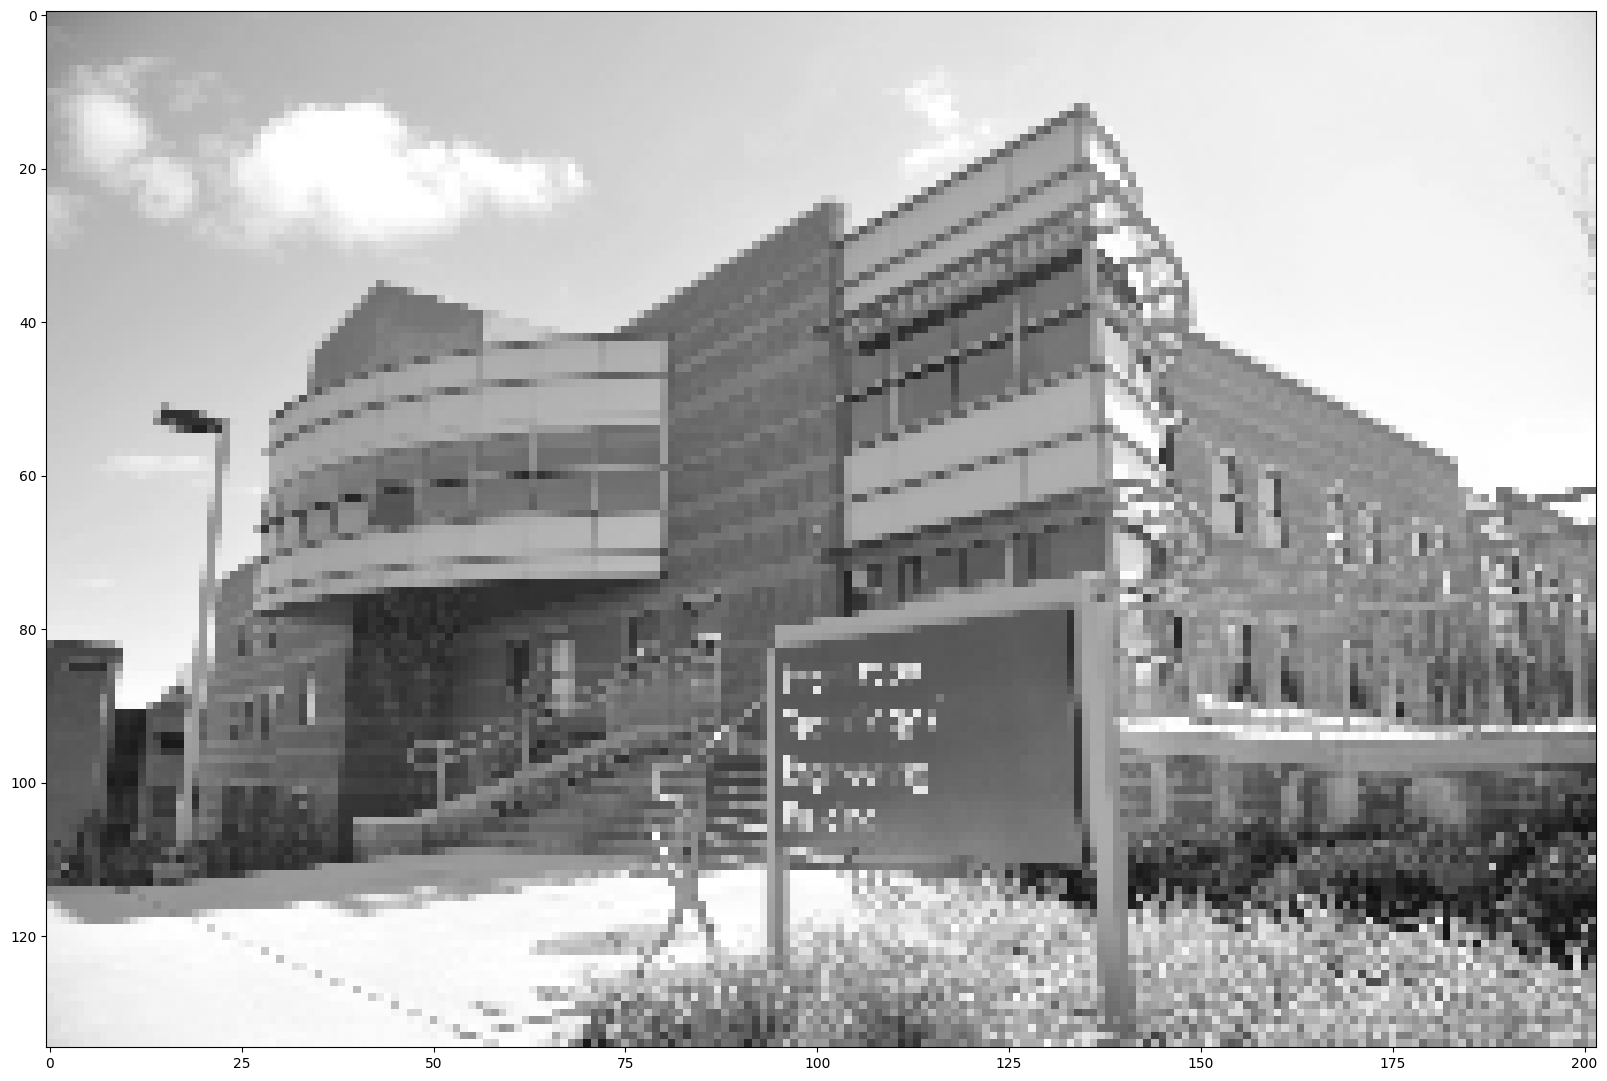

In [ ]:
# Giảm kích thước ảnh xuống 1/16 kích thước ban đầu
n = 4                                           
w, h = im_rgb_uint8.shape[0] // n, im_rgb_uint8.shape[1] // n
im_small = np.zeros((w, h, im_rgb_uint8.shape[2]), dtype=im_rgb_uint8.dtype)
for i in range(w):
   for j in range(h):
      im_small[i, j] = im_rgb_uint8[n*i, n*j]
# Lưu ảnh đã giảm kích thước dưới dạng umbc_small.jpg
skimage.io.imsave('umbc_small.jpg', im_small)   
plt.figure(figsize=(20,20))
# Hiển thị ảnh đã giảm kích thước
plt.imshow(im_small)                            
plt.show()

#### 6. Giảm kích thước ảnh đã làm mờ

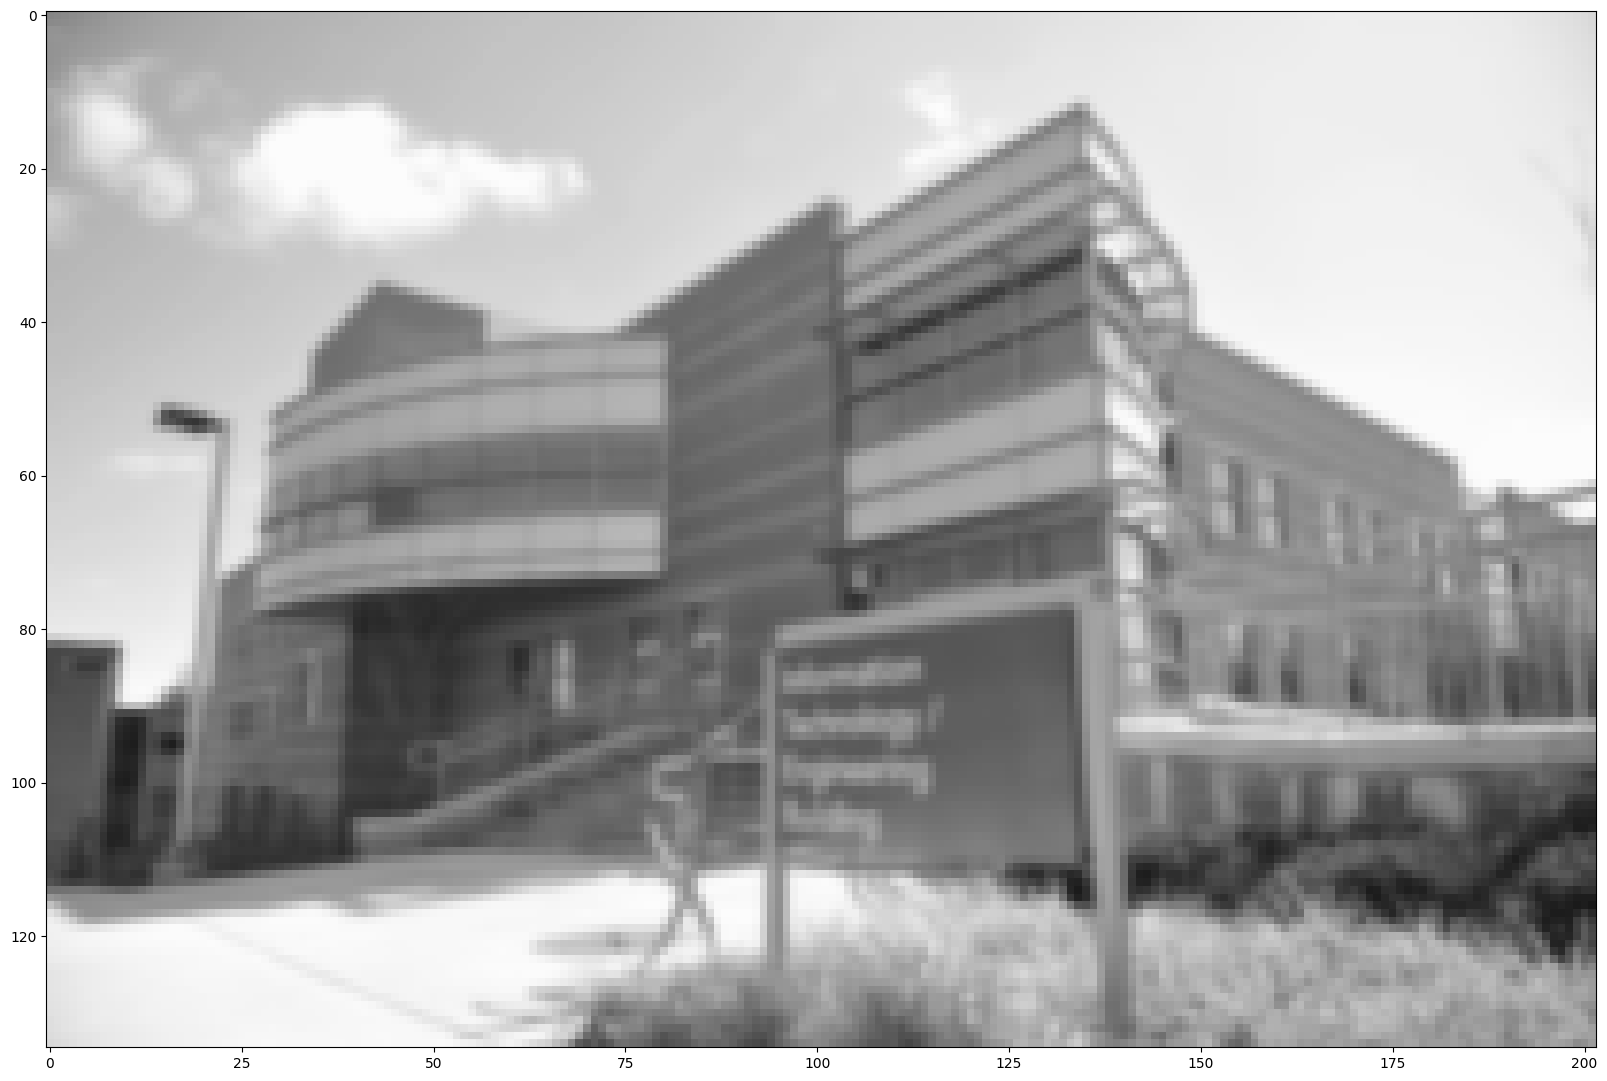

In [ ]:
# Giảm kích thước ảnh đã làm mờ xuống 1/16 kích thước ban đầu
im_small = np.zeros((w, h, im_blurred.shape[2]), dtype=im_blurred.dtype)
for i in range(w):
   for j in range(h):
      im_small[i, j] = im_blurred[n*i, n*j]
skimage.io.imsave('umbc_blurred_small.jpg', im_small)
plt.figure(figsize=(20,20))
# Hiển thị ảnh đã làm mờ và giảm kích thước
plt.imshow(im_small)          
plt.show()